In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic["age"].mean()

29.69911764705882

In [4]:
titanic[["age", "fare"]].median()

age     28.0000
fare    14.4542
dtype: float64

In [5]:
titanic[["age", "fare"]].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Aggregating statistics

In [6]:
titanic.agg(
    {
        "age": ["min", "max", "median", "skew"],
        "fare": ["min", "max", "median", "mean"],
    }
)

,age,fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


### Aggregating statistics grouped by category

In [7]:
titanic[["sex", "age"]].groupby("sex").mean()

,age
sex,
female,27.915709
male,30.726645


In [8]:
titanic.groupby("sex").mean(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [9]:
titanic.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [10]:
titanic.groupby(["sex", "pclass"])["fare"].mean()

sex     pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: fare, dtype: float64

### Count number of records by category

In [11]:
titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [12]:
titanic.groupby("pclass")["pclass"].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

### How to reshape the layout of tables?

### Sort table rows

In [13]:
titanic.sort_values(by="age").head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [14]:
titanic.sort_values(by=['pclass', 'age'], ascending=False).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,NaN,Southampton,no,True


### Long to wide table format

## pivot()
### The pivot() function is purely reshaping of the data: a single value for each index/column combination is required.

In [15]:
result = titanic.pivot(columns="class", values="age")
result.head()

class,First,Second,Third
0,NaN,NaN,22.0
1,38.0,NaN,NaN
2,NaN,NaN,26.0
3,35.0,NaN,NaN
4,NaN,NaN,35.0


<AxesSubplot:>

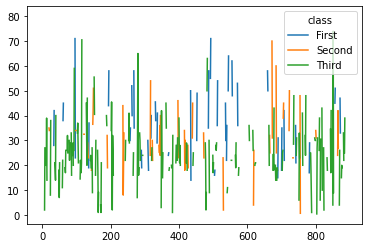

In [16]:
result.plot()

In [17]:
titanic.pivot_table(
    values="age", index="class", columns="sex", aggfunc="mean"
)


sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589
